<a href="https://colab.research.google.com/github/shyamsagar651/hotel-booking-eda-project/blob/main/Hotel_booking_Syam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import folium
import plotly.express as px
import seaborn as sns
%matplotlib inline

In [ ]:
## Import csv file and mount drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Hotel booking/Hotel Bookings.csv")

In [ ]:
data.describe()
## Showed describe given data set.

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


We can see that there are 32 columns in the dataframe and some columns like 'children', 'company', 'country' and 'agent' have null values.

In [ ]:
pd.set_option('display.max_columns', None)
data.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
data.tail()
## Last 5 rows given data set.

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
## Check the data set shape.
data.shape

(119390, 32)

In [ ]:
## Creating a copy of dataframe
df1= data.copy()


First of all we will try to understand the meaning of all columns of the dataframe. For this we will see the unique values attained by each column whose meaning we are unable to understand.

In [ ]:
## Check the hotel value.
data.hotel.value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [ ]:
## Find the unique elements of an array
df1['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
df1['is_canceled'].unique()

array([0, 1])

In [ ]:
df1['arrival_date_year'].unique()

array([2015, 2016, 2017])

In [ ]:
df1['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [ ]:
df1['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [ ]:
df1['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [ ]:
df1['children'].unique()    # This column has 0 as well as null values

array([ 0.,  1.,  2., 10.,  3., nan])

In [ ]:
data.info()
## info command use for showing type of value like object, integer, float and columns, etries etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

##Cleaning data
Cleaning data is crucial step before EDA as it will remove the ambigous data that can affect the outcome of EDA.

While cleaning data we will perform following steps: 
1. Remove duplicate rows.
2. Handling missing values.
3. Convert columns to appropriate datatypes.
4. Adding important columns


#Step 1: Removing duplicate rows if any

In [ ]:
df1[df1.duplicated()].shape   # Show no. of rows of duplicate rows duplicate rows

(31994, 32)

In [ ]:
# Dropping duplicate values
df1.drop_duplicates(inplace = True)

In [ ]:
df1.shape

(87396, 32)

#Step2: Handling missing values.

In [ ]:
 # Columns having missing values.
df1.isnull().sum().sort_values(ascending = False)[:6]

company               82137
agent                 12193
country                 452
children                  4
reserved_room_type        0
assigned_room_type        0
dtype: int64

Since, company and agent columns have comany number and agent numbers as data. There may be some cases when customer didnt booked hotel via any agent or via any company. So in that case values can be null under these columns. We will replace null values by 0 in these columns.

In [ ]:
df1[['company','agent']] = df1[['company','agent']].fillna(0)

In [ ]:
df1['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

This column 'children' has 0 as value which means 0 children were present in group of customers who made that transaction. So, 'nan' values are the missing values due to error of recording data. We will replace the null values under this column with mean value of children.

In [ ]:
df1['children'].fillna(df1['children'].mean(), inplace = True)

Next column with missing value is 'country'. This column represents the country of oriigin of customer. Since, this column has datatype of string. We will replace the missing value with the mode of 'country' column.

In [ ]:
df1['country'].fillna('others', inplace = True)

In [ ]:
# Checking if all null values are removed
df1.isnull().sum().sort_values(ascending = False)[:6]

hotel                          0
is_canceled                    0
reservation_status             0
total_of_special_requests      0
required_car_parking_spaces    0
adr                            0
dtype: int64


There are some rows with total number of adults, children or babies equal to zero. So we will remove such rows.

In [ ]:
df1[df1['adults']+df1['babies']+df1['children'] == 0].shape

(166, 32)

In [ ]:
df1.drop(df1[df1['adults']+df1['babies']+df1['children'] == 0].index, inplace = True)

# Step 3: Converting columns to appropriate data types.

In [ ]:
# Adding total people num as column, i.e. total people num = num of adults + children + babies
df1['total_people'] = df1['adults']+df1['children']+df1['babies']

# Step 4: Adding important columns.

In [ ]:
# Adding total staying days in hotels
df1['total_stay'] = df1['stays_in_weekend_nights']+df1['stays_in_week_nights']

In [ ]:
# Adding total people num as column, i.e. total people num = num of adults + children + babies
df1['total_people'] = df1['adults']+df1['children']+df1['babies']

We are adding this column so that we can analyse the stay length at hotels.



Lets first find the correlation between the numerical data.

Since, columns like 'is_cancelled', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'is_repeated_guest', 'company', 'agent' are categorical data having numerical type. So we wont need to check them for correlation.

Also, we have added total_stay and total_people columns. So, we can remove adults, children, babies, stays_in_weekend_nights, stays_in_week_nights columns.

In [ ]:
num_df1 = df1[['lead_time','total_stay','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','total_people']]

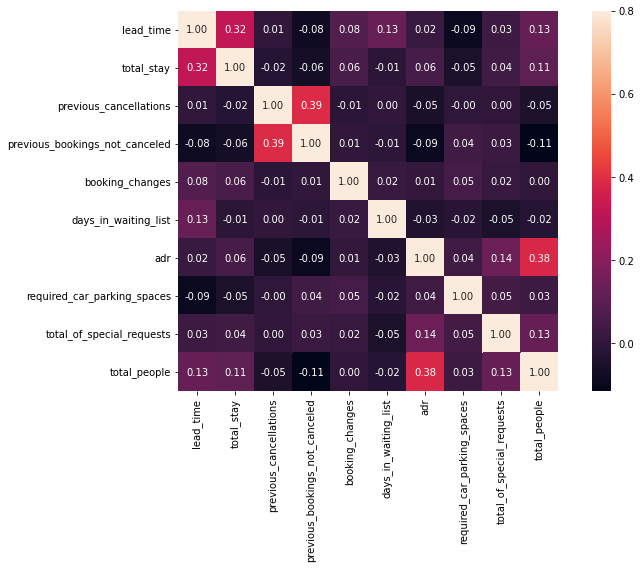

In [ ]:
# Correlation matrix
corrmat = num_df1.corr()
f, ax= plt.subplots(figsize=(12,7))
sns.heatmap(corrmat,annot = True,fmt='.2f', annot_kws={'size': 10}, vmax=.8, square=True);

1. Total stay length and lead time have slight correlation. This may means that for longer hotel stays people generally plan little before the actual arrival.
2. adr is slightly correlated with total_people, which makes sense as more no of people means more revenue, therefore more adr.

  Lets see does length of stay affects the adr.

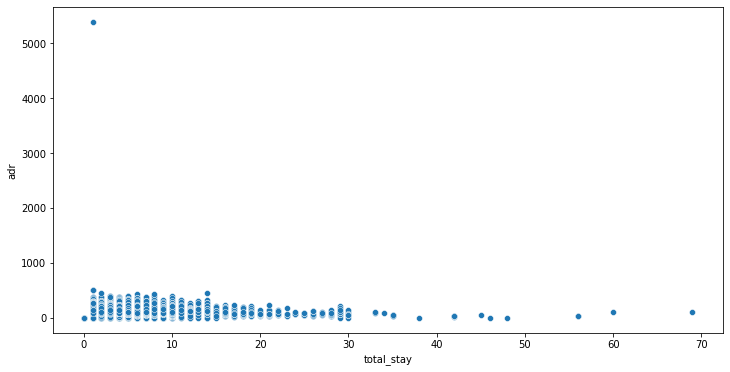

In [ ]:

plt.figure(figsize = (12,6))
sns.scatterplot(y='adr', x='total_stay', data= df1)
plt.show()

We notice that there is an outlier in adr, so we will remove that for better scatter plot

In [ ]:
df1.drop(df1[df1['adr'] > 5000].index, inplace = True)

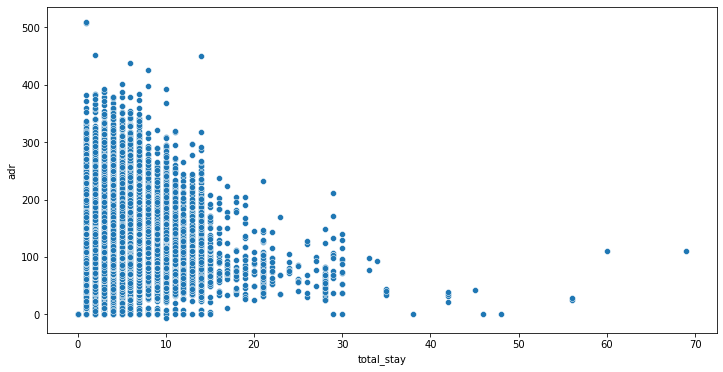

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(y='adr',x='total_stay',data=df1)
plt.show()

From the scatter plot we can see that as length of total_stay increases the adr decreases. This means for longer stay, the better deal for customer can be finalised.

# Univariate Analysis


Which agent makes most no. of bookings?

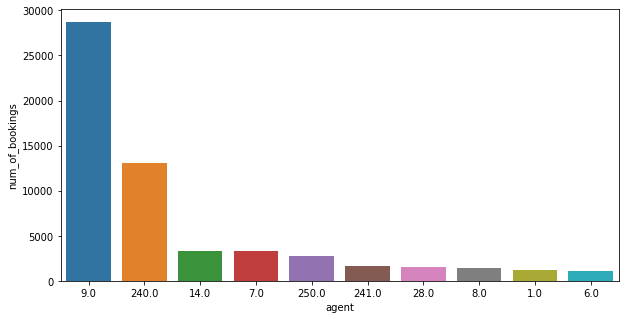

In [ ]:
d1= pd.DataFrame(df1['agent'].value_counts()).reset_index().rename(columns= {'index':'agent','agent':'num_of_bookings'}).sort_values(by = 'num_of_bookings', ascending = False)
d1.drop(d1[d1['agent'] == 0].index, inplace = True)            # 0 represents that booking is not made by an agent
d1 = d1[:10]                                                   # Selecting top 10 performing agents
plt.figure(figsize = (10,5))
sns.barplot(x='agent', y='num_of_bookings', data = d1,  order = d1.sort_values('num_of_bookings', ascending = False).agent)

Agent with id no. 9 made most of the bookings.

2. Which room type is in most demand and which room type generates highest adr?

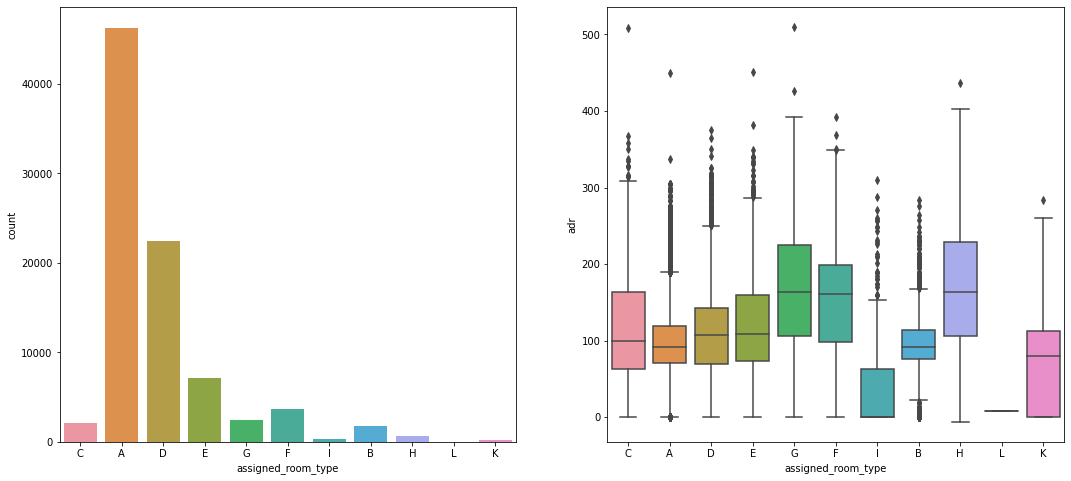

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
grp_by_room = df1.groupby('assigned_room_type')
d1['Num_of_bookings'] = grp_by_room.size()

sns.countplot(ax= axes[0], x=df1['assigned_room_type'])
sns.boxplot(ax=axes[1], x=df1['assigned_room_type'], y= df1['adr'])
plt.show()

Most demanded room type is A, but better adr rooms are of type H, G and C also. Hotels should increase the no. of room types A and H to maximise revenue.

3. Which meal type is most preffered meal of customers?

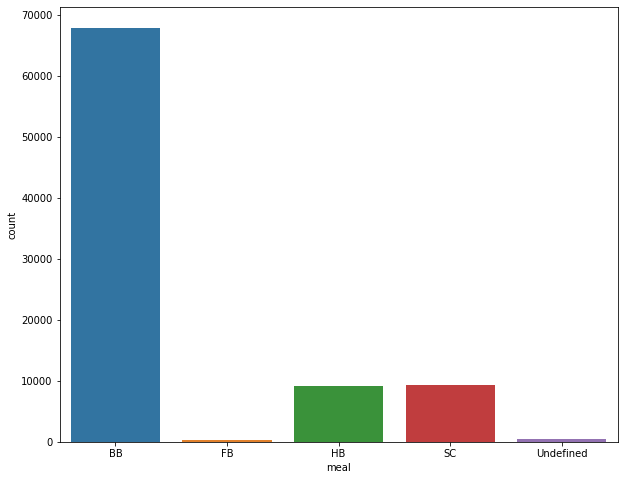

In [ ]:
 plt.figure(figsize = (10, 8))
 sns.countplot(x = df1['meal'])
 plt.show()

Most preferred meal type is BB (Bed and breakfast).

# Hotel wise analysis
 What is percentage of bookings in each hotel?

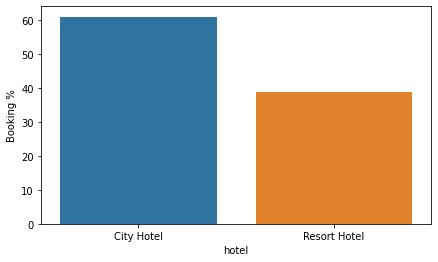

In [ ]:
grouped_by_hotel = df1.groupby('hotel')
d1 = pd.DataFrame((grouped_by_hotel.size()/df1.shape[0])*100).reset_index().rename(columns = {0:'Booking %'})      #Calculating percentage
plt.figure(figsize = (7,4))
sns.barplot(x = d1['hotel'], y = d1['Booking %'] )
plt.show()

Around 60% bookings are for City hotel and 40% bookings are for Resort hotel.

2. which hotel seems to make more revenue?

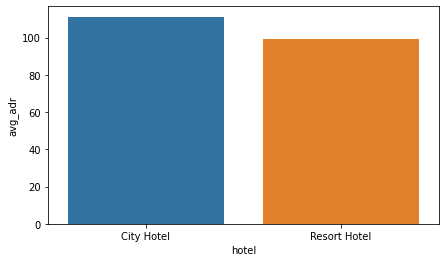

In [ ]:
d3 =  grouped_by_hotel['adr'].agg(np.mean).reset_index().rename(columns = {'adr':'avg_adr'})   # calculating average adr
plt.figure(figsize = (7,4))
sns.barplot(x=d3['hotel'], y=d3['avg_adr'])
plt.show()

Avg adr of Resort hotel is slightly lower than that of City hotel. Hence, City hotel seems to be making slightly more revenue.

3. Which hotel has higher lead time?

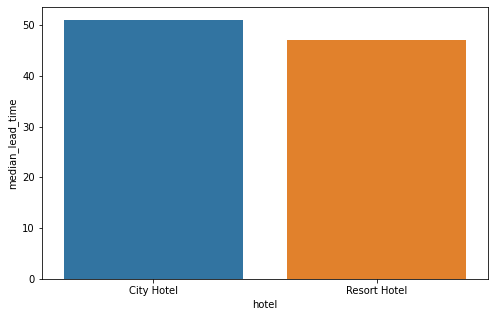

In [ ]:
d2 = grouped_by_hotel['lead_time'].median().reset_index().rename(columns={'lead_time':'median_lead_time'})
plt.figure(figsize=(8,5))
sns.barplot(x=d2['hotel'],y=d2['median_lead_time'])
plt.show()

City hotel has slightly higher median lead time. Also median lead time is significantly higher in each case, this means customers generally plan their hotel visits way to early.

4. What is preferred stay length in each hotel?

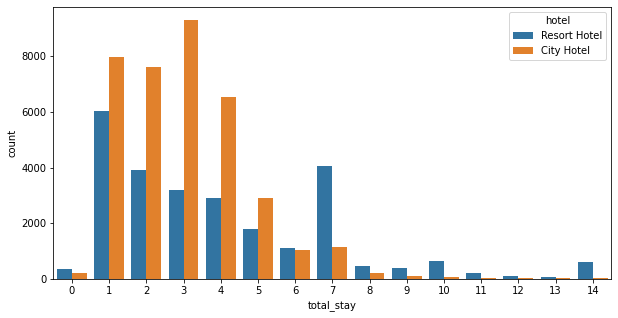

In [ ]:
not_canceled = df1[df1['is_canceled']==0]
s1= not_canceled[not_canceled['total_stay']<15]
plt.figure(figsize=(10,5))
sns.countplot(x=s1['total_stay'], hue = s1['hotel'])

Most common stay length is less than 4 days and generally people prefer City hotel for short stay, but for long stays, Resort Hotel is preferred.

5. Which hotel has longer waiting time?

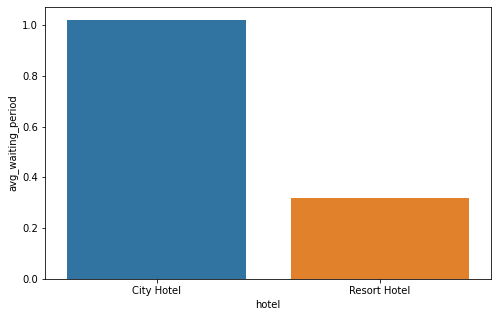

In [ ]:
d5 = pd.DataFrame(grouped_by_hotel['days_in_waiting_list'].agg(np.mean).reset_index().rename(columns = {'days_in_waiting_list':'avg_waiting_period'}))
plt.figure(figsize = (8,5))
sns.barplot(x = d5['hotel'], y = d5['avg_waiting_period'] )
plt.show()

City hotel has significantly longer waiting time, hence City Hotel is much busier than Resort Hotel.

6. Which hotel has higher bookings cancellation rate.

In [ ]:
# Selecting and counting number of cancelled bookings for each hotel.
cancelled_data = df1[df1['is_canceled'] == 1]
cancel_grp = cancelled_data.groupby('hotel')
D1 = pd.DataFrame(cancel_grp.size()).rename(columns = {0:'total_cancelled_bookings'})

# Counting total number of bookings for each type of hotel
grouped_by_hotel = df1.groupby('hotel')
total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D3 = pd.concat([D1,D2], axis = 1)

# Calculating cancel percentage 
D3['cancel_%'] = round((D3['total_cancelled_bookings']/D3['total_bookings'])*100,2)
D3

,total_cancelled_bookings,total_bookings,cancel_%
hotel,,,
City Hotel,16034,53273,30.10
Resort Hotel,7974,33956,23.48


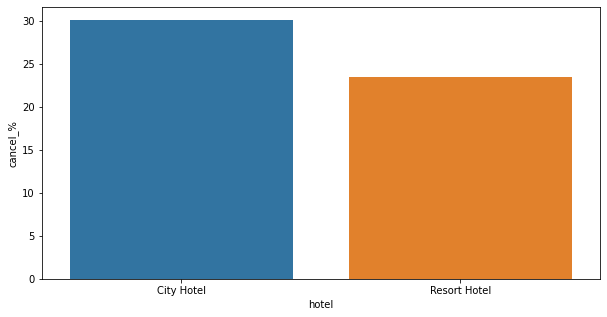

In [ ]:
plt.figure(figsize = (10,5))
sns.barplot(x=D3.index, y= D3['cancel_%'])
plt.show()

7. Which hotel has high chance that its customer will return for another stay?

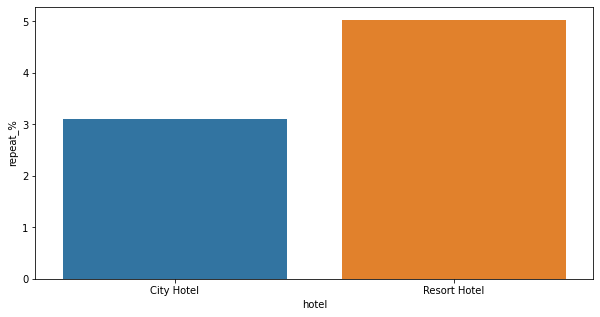

In [ ]:
# Selecting and counting repeated customers bookings
repeated_data = df1[df1['is_repeated_guest'] == 1]
repeat_grp = repeated_data.groupby('hotel')
D1 = pd.DataFrame(repeat_grp.size()).rename(columns = {0:'total_repeated_guests'})

# Counting total bookings
total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D3 = pd.concat([D1,D2], axis = 1)

# Calculating repeat %
D3['repeat_%'] = round((D3['total_repeated_guests']/D3['total_bookings'])*100,2)

plt.figure(figsize = (10,5))
sns.barplot(x = D3.index, y = D3['repeat_%'])
plt.show()

Both hotels have very small percentage that customer will repeat, but Resort hotel has slightly higher repeat % than City Hotel.


 # Distribution Channel wise Analysis
Q1. Which is the most common channel for booking hotels?

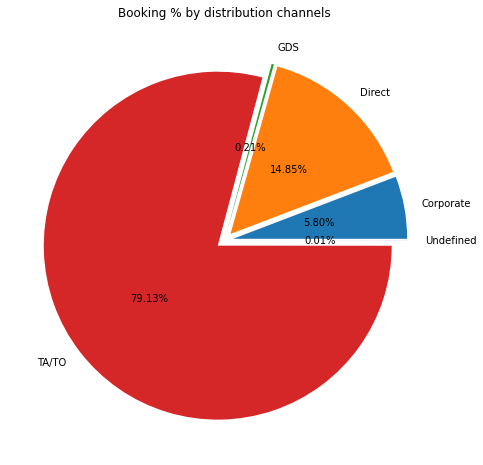

In [ ]:
group_by_dc = df1.groupby('distribution_channel')
d1 = pd.DataFrame(round((group_by_dc.size()/df1.shape[0])*100,2)).reset_index().rename(columns = {0: 'Booking_%'})
plt.figure(figsize = (8,8))
data = d1['Booking_%']
labels = d1['distribution_channel']
plt.pie(x=data, autopct="%.2f%%", explode=[0.05]*5, labels=labels, pctdistance=0.5)
plt.title("Booking % by distribution channels", fontsize=12);

Q2. Which channel is mostly used for early booking of hotels?

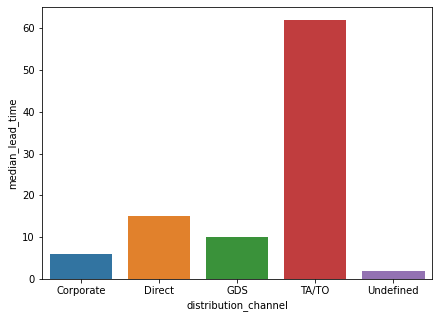

In [ ]:
group_by_dc = df1.groupby('distribution_channel')
d2 = pd.DataFrame(round(group_by_dc['lead_time'].median(),2)).reset_index().rename(columns = {'lead_time': 'median_lead_time'})
plt.figure(figsize = (7,5))
sns.barplot(x = d2['distribution_channel'], y = d2['median_lead_time'])
plt.show()

TA/TO is mostly used for planning Hotel visits ahead of time. But for sudden visits other mediums are most preferred.

Q3. Which channel has longer average waiting time?

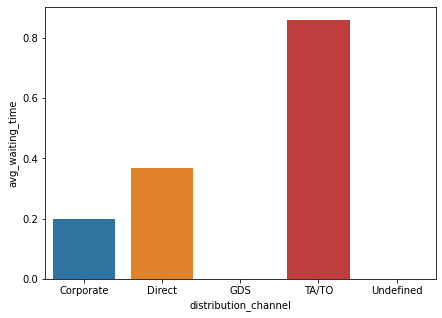

In [ ]:
d4 = pd.DataFrame(round((group_by_dc['days_in_waiting_list']).mean(),2)).reset_index().rename(columns = {'days_in_waiting_list': 'avg_waiting_time'})
plt.figure(figsize = (7,5))
sns.barplot(x = d4['distribution_channel'], y = d4['avg_waiting_time'])
plt.show()

While booking via TA/TO one may have to wait a little longer to confirm booking of rooms.

Q4. Which distribution channel brings better revenue generating deals for hotels?

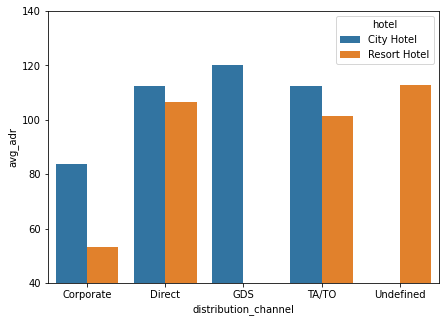

In [ ]:
group_by_dc_hotel = df1.groupby(['distribution_channel', 'hotel'])
d5 = pd.DataFrame(round((group_by_dc_hotel['adr']).agg(np.mean),2)).reset_index().rename(columns = {'adr': 'avg_adr'})
plt.figure(figsize = (7,5))
sns.barplot(x = d5['distribution_channel'], y = d5['avg_adr'], hue = d5['hotel'])
plt.ylim(40,140)
plt.show()

GDS channel brings higher revenue generating deals for City hotel, in contrast to that most bookings come via TA/TO. City Hotel can work to increase outreach on GDS channels to get more higher revenue generating deals.

Resort hotel has more revnue generating deals by direct and TA/TO channel. Resort Hotel need to increase outreach on GDS channel to increase revenue.

# Booking cancellation Analysis
Let us try to understand what causes the people to cancel the booking.

Q1. Which significant distribution channel has highest cancellation percentage?

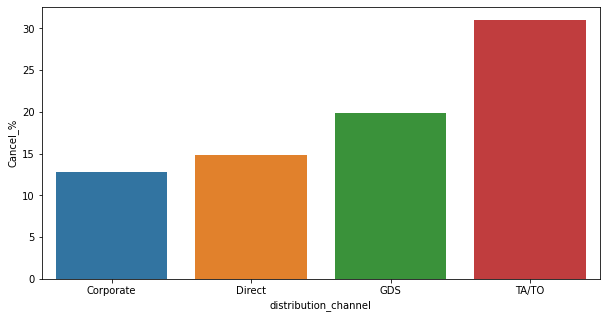

In [ ]:
d1 = pd.DataFrame((group_by_dc['is_canceled'].sum()/group_by_dc.size())*100).drop(index = 'Undefined').rename(columns = {0: 'Cancel_%'})
plt.figure(figsize = (10,5))
sns.barplot(x = d1.index, y = d1['Cancel_%'])
plt.show()

TA/TO has highest booking cancellation %. Therefore, a booking via TA/TO is 30% likely to get cancelled.

Let us see what causes the cancelation of bookings of rooms by customers One question can arise that may be longer waiting period or longer lead time causes the cancellation of bookings, let us check that.

In [ ]:
waiting_bookings = df1[df1['days_in_waiting_list'] !=0]

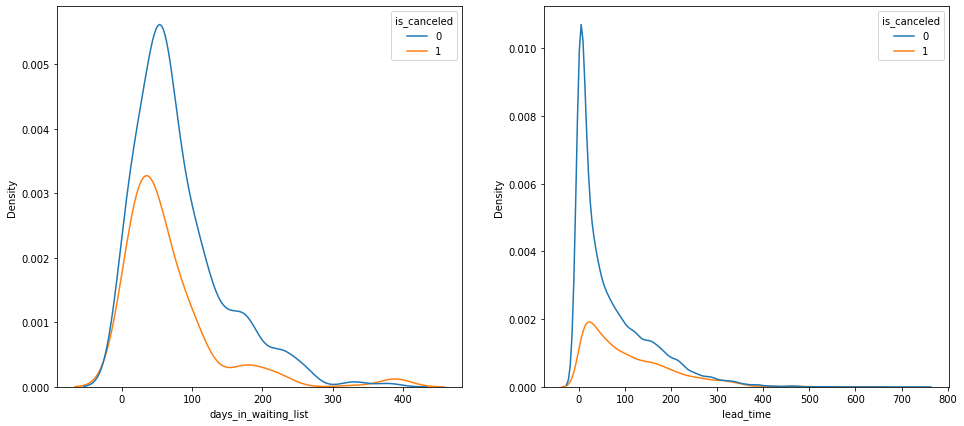

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(16,7))
sns.kdeplot(ax=axes[0], x='days_in_waiting_list',  hue= 'is_canceled', data = waiting_bookings)
sns.kdeplot(ax=axes[1], x=df1['lead_time'], hue = df1['is_canceled'])
plt.show()


We see that most of the bookings that are cancelled have waiting period of less 150 days but also most of bookings that are not cancelled also have waiting period less than 150 days. Hence this shows that waiting period has no effect on cancellation of bookings. Also, lead time has no affect on cancellation of bookings, as both curves of cancelation and not cncelation are similar for lead time too.

Now we will check whether not getting allotted the same room type as demanded is the cause of cancellation fo bookings

In [ ]:
def check_room_allot(x):
  if x['reserved_room_type']!= x['assigned_room_type']:
    return 1
  else:
    return .0
df1['same_room_not_alloted'] = df1.apply(lambda x : check_room_allot(x), axis = 1)
grp_by_canc = df1.groupby('is_canceled')


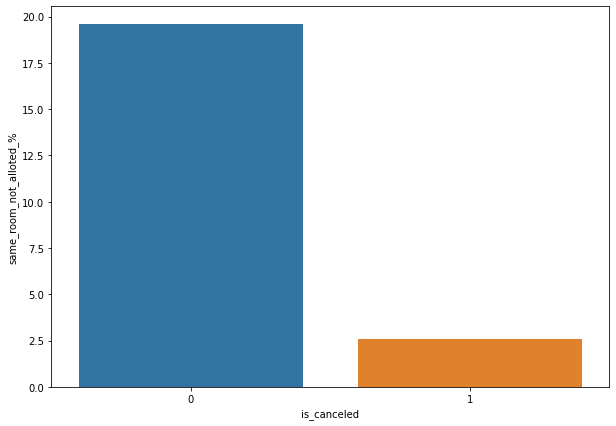

In [ ]:
D3 = pd.DataFrame((grp_by_canc['same_room_not_alloted'].sum()/grp_by_canc.size())*100).rename(columns = {0: 'same_room_not_alloted_%'})
plt.figure(figsize = (10,7))
sns.barplot(x = D3.index, y = D3['same_room_not_alloted_%'])
plt.show()

We see that not getting same room as demanded is not the case of cancellation of rooms. A significant percentage of bookings are not cancelled even after getting different room as demanded.

Lets see does not getting same room affects the adr.

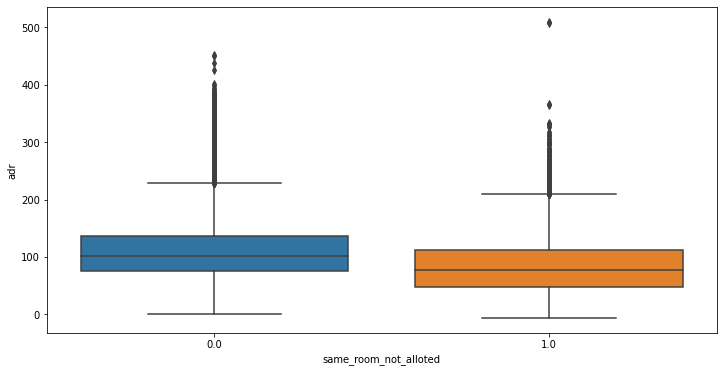

In [ ]:
plt.figure(figsize = (12,6))
sns.boxplot(x = 'same_room_not_alloted', y = 'adr', data = df1)
plt.show()


So not getting same room do affects the adr, people who didn't got same room have paid a little lower adr, except for few exceptions.

#Analysis acording to time

In [ ]:
# Find most busy moth?
d_month = df1['arrival_date_month'].value_counts().reset_index()
d_month.columns = ['months','Number of guests']
d_month
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'] 
d_month['months'] = pd.Categorical(d_month['months'], categories=months, ordered=True)
d_month.sort_values('months').reset_index()

,index,months,Number of guests
0,11,January,4685
1,8,February,6083
2,5,March,7488
3,3,April,7900
4,2,May,8344
5,4,June,7756
6,1,July,10043
7,0,August,11242
8,7,September,6682
9,6,October,6921


##Time wise analysis

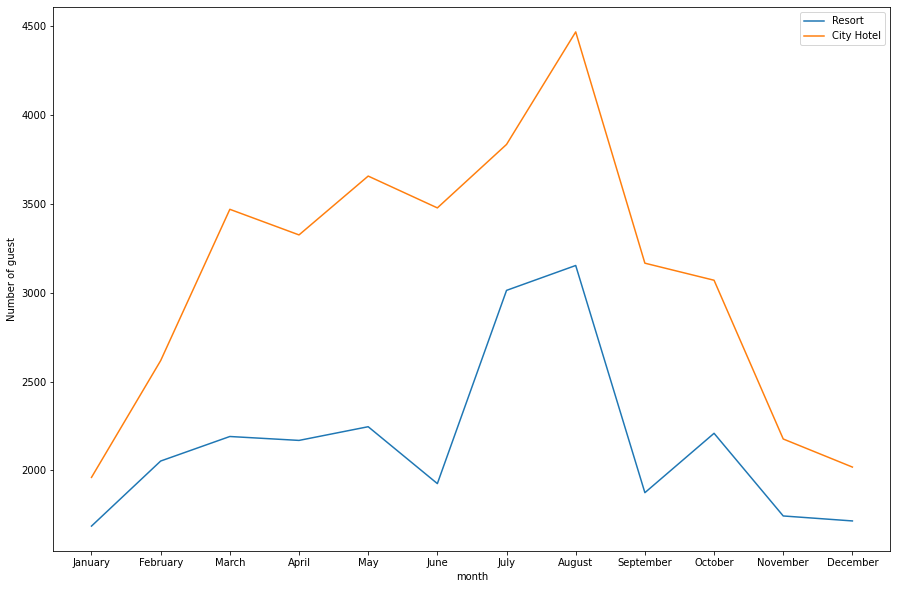

In [ ]:
#Which are the most busy months?
d_month = df1['arrival_date_month'].value_counts().reset_index()
d_month.columns=['months','Number of guests']
d_month
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
d_month['months'] = pd.Categorical(d_month['months'], categories=months, ordered=True)
d_month.sort_values('months').reset_index()


data_resort = df1[(df1['hotel'] == 'Resort Hotel') & (df1['is_canceled'] == 0)]
data_city = df1[(df1['hotel'] == 'City Hotel') & (df1['is_canceled'] == 0)]
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
final_hotel = resort_hotel.merge(city_hotel, on = 'arrival_date_month')
final_hotel.columns = ['month', 'price_for_resort', 'price_for_city_hotel']
final_hotel

resort_guest = data_resort['arrival_date_month'].value_counts().reset_index()
resort_guest.columns=['month','no of guests']
resort_guest

city_guest = data_city['arrival_date_month'].value_counts().reset_index()
city_guest.columns=['month','no of guests']
city_guest

final_guest=resort_guest.merge(city_guest, on = 'month')
final_guest.columns=['month','no of guests in resort','no of guest in city hotel']
final_guest
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
final_guest['month'] = pd.Categorical(final_guest['month'], categories=months, ordered=True)
final_guest = final_guest.sort_values('month').reset_index()

#Which month get most visitors?
sns.lineplot(data=final_guest, x='month', y='no of guests in resort')
sns.lineplot(data=final_guest, x='month', y='no of guest in city hotel')
plt.legend(['Resort','City Hotel'])
plt.ylabel('Number of guest')
fig = plt.gcf()
fig.set_size_inches(15,10)

Most number of guest comes in month of August.

Now lets see which month results in high revenue.

In [ ]:
data_resort = df1[(df1['hotel'] == 'Resort Hotel') & (df1['is_canceled'] == 0)]
data_city = df1[(df1['hotel'] == 'City Hotel') & (df1['is_canceled'] == 0)]

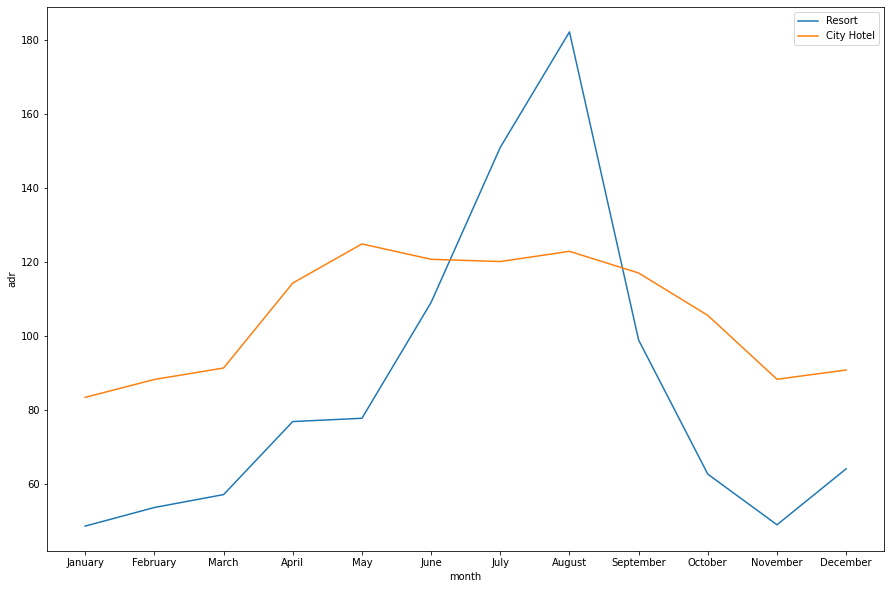

In [ ]:
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
final_hotel = resort_hotel.merge(city_hotel, on = 'arrival_date_month')
final_hotel.columns = ['month', 'price_for_resort', 'price_for_city_hotel']
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
final_hotel['month'] = pd.Categorical(final_hotel['month'], categories=months, ordered=True)
final_hotel = final_hotel.sort_values('month').reset_index()
sns.lineplot(data=final_hotel, x='month', y='price_for_resort')
sns.lineplot(data=final_hotel, x='month', y='price_for_city_hotel')
plt.legend(['Resort','City Hotel'])
plt.ylabel('adr')
fig = plt.gcf()
fig.set_size_inches(15,10)

The revenue aspect  looks different, the  Resort Hotels receives  more revenue with  respect to City Hotel.

From May to August  there was rapid increase  in adr. August recorded  the highest.


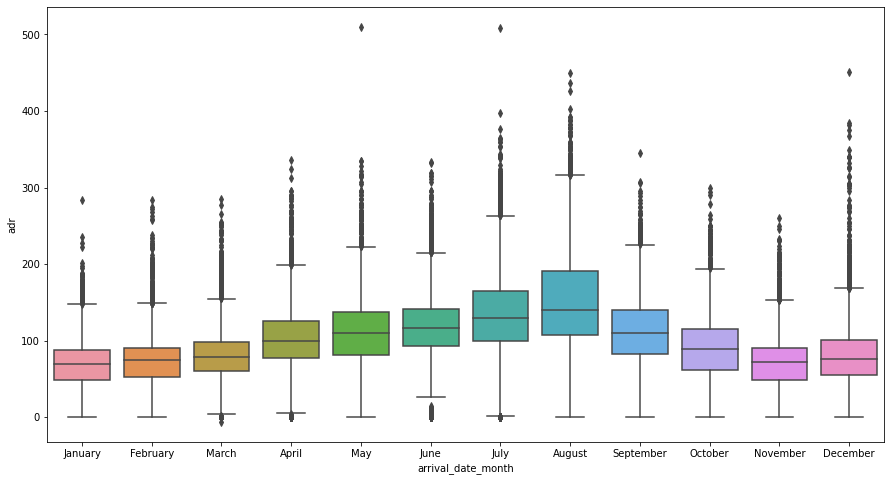

In [ ]:
reindex = ['January', 'February','March','April','May','June','July','August','September','October','November','December']
df1['arrival_date_month'] = pd.Categorical(df1['arrival_date_month'],categories=reindex,ordered=True)
plt.figure(figsize = (15,8))
sns.boxplot(x = df1['arrival_date_month'],y = df1['adr'])
plt.show()

Avg adr rises from beginning of year upto middle of year and reaches peak at August and then lowers to the end of year. But hotels do make some good deals with high adr at end of year also.


Let us divide our customers in three categories of single, couple and family/friends. then check their booking %

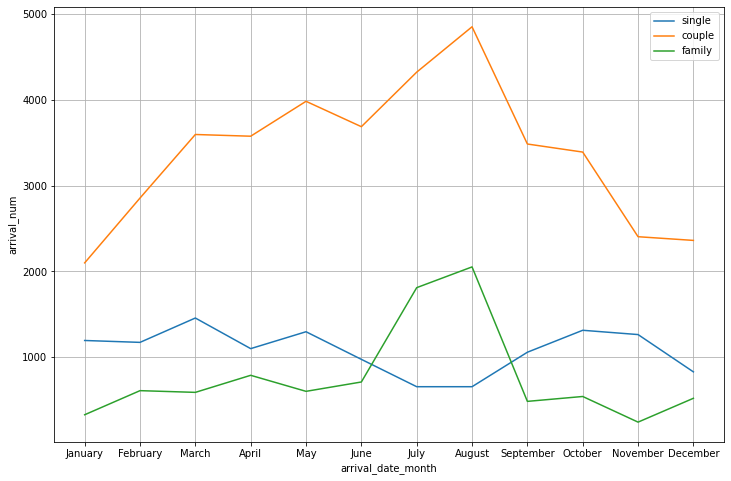

In [ ]:
## Select single, couple, multiple adults and family
single   = not_canceled[(not_canceled['adults']==1) & (not_canceled['children']==0) & (not_canceled['babies']==0)]
couple   = not_canceled[(not_canceled['adults']==2) & (not_canceled['children']==0) & (not_canceled['babies']==0)]
family   = not_canceled[not_canceled['adults'] + not_canceled['children'] + not_canceled['babies'] > 2]

reindex = ['January', 'February','March','April','May','June','July','August','September','October','November','December']

fig, ax = plt.subplots(figsize=(12, 8))

for type in ['single', 'couple', 'family']:
  d1 = eval(type).groupby(['arrival_date_month']).size().reset_index().rename(columns = {0:'arrival_num'})
  d1['arrival_date_month'] = pd.Categorical(d1['arrival_date_month'],categories=reindex,ordered=True)
  sns.lineplot(data=d1, x= 'arrival_date_month', y='arrival_num', label=type, ax=ax)
  
plt.grid()
plt.show()

Moslty bookings are done by couples.

It is clear from graph that their is a sudden surge in arrival num of couples and family in months of July and August. So better plans can be planned accordingly at that time for these type of customers.

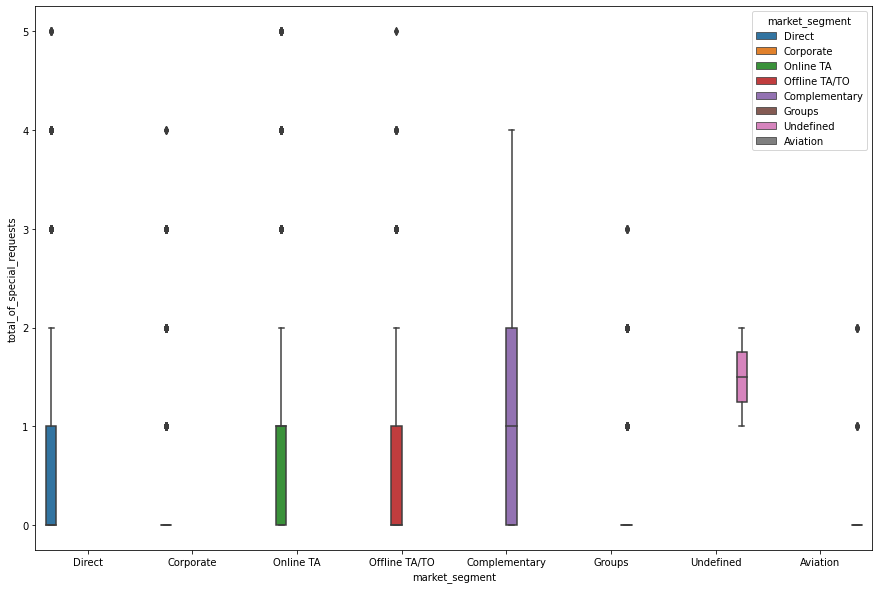

In [ ]:
# Special request acording to market segment.
sns.boxplot(x="market_segment", y="total_of_special_requests",hue='market_segment',data= df1)
fig= plt.gcf()
fig.set_size_inches(15,10)

All of market segment mostly have special request.

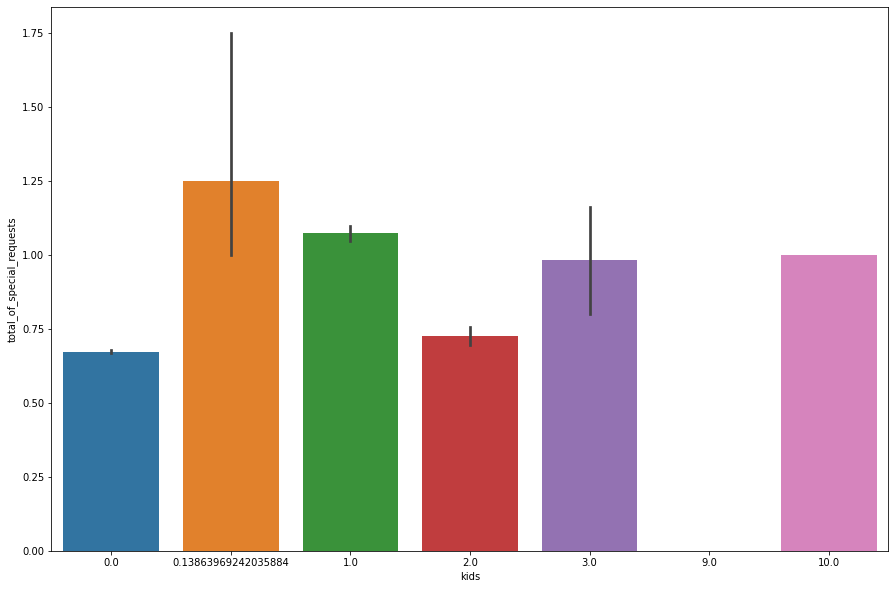

In [ ]:
# Special request acording to number of kid.
df1['kids']= df1['children']+df1['babies']
sns.barplot(x='kids', y='total_of_special_requests', data= df1)
fig=plt.gcf()
fig.set_size_inches(15,10)

##Most guests are coming.

In [ ]:
country_wise_guests = df1[df1['is_canceled'] == 0]['country'].value_counts().reset_index()
country_wise_guests.columns = ['country', 'No of guests']
country_wise_guests

,country,No of guests
0,PRT,17573
1,GBR,8440
2,FRA,7091
3,ESP,5382
4,DEU,4332
...,...,...
161,ZMB,1
162,SYC,1
163,MDG,1
164,SMR,1


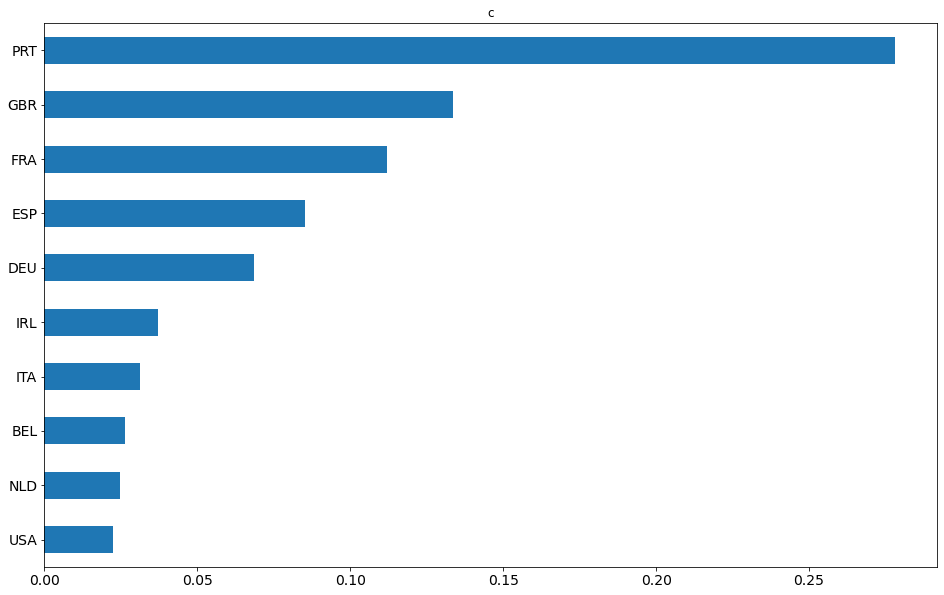

In [ ]:
# Country univariant analysis only for top 10 countries
fig, axes = plt.subplots(1, 1, figsize=(16, 10)) 
_ = data['country'].value_counts(normalize=True).head(10).sort_values(ascending=True).plot(kind = 'barh', title='c', fontsize=14)

In [ ]:
basemap = folium.Map()
guests_map = px.choropleth(country_wise_guests, locations = country_wise_guests['country'],color = country_wise_guests['No of guests'], hover_name = country_wise_guests['country'])
guests_map.show()

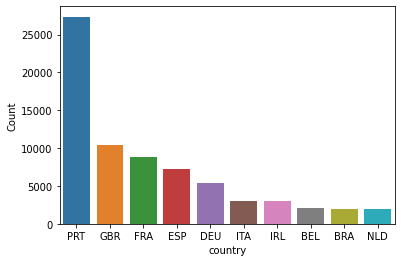

In [ ]:
grouped_by_country = df1.groupby('country')
d1 = pd.DataFrame(grouped_by_country.size()).reset_index().rename(columns = {0:'Count'}).sort_values('Count', ascending = False)[:10]
sns.barplot(x = d1['country'], y  = d1['Count'])
plt.show()

Most guest are from Portugal and other Europian contries.


# How long people stay at the hotel?

In [ ]:
filter = df1['is_canceled']== 0
data =  df1[filter]
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_people,total_stay,same_room_not_alloted,kids
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0,0,0.0,0.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0,0,0.0,0.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0,1,1.0,0.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0,1,0.0,0.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2.0,2,0.0,0.0


In [ ]:
data['total_nights'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_people,total_stay,same_room_not_alloted,kids,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0,0,0.0,0.0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0,0,0.0,0.0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0,1,1.0,0.0,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0,1,0.0,0.0,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2.0,2,0.0,0.0,2


In [ ]:
stay = data.groupby(['total_nights', 'hotel']).agg('count').reset_index()
stay = stay.iloc[:, :3]
stay = stay.rename(columns={'is_canceled':'Number of stays'})
stay

,total_nights,hotel,Number of stays
0,0,City Hotel,218
1,0,Resort Hotel,350
2,1,City Hotel,7972
3,1,Resort Hotel,6036
4,2,City Hotel,7630
...,...,...,...
57,46,Resort Hotel,1
58,48,City Hotel,1
59,56,Resort Hotel,1
60,60,Resort Hotel,1


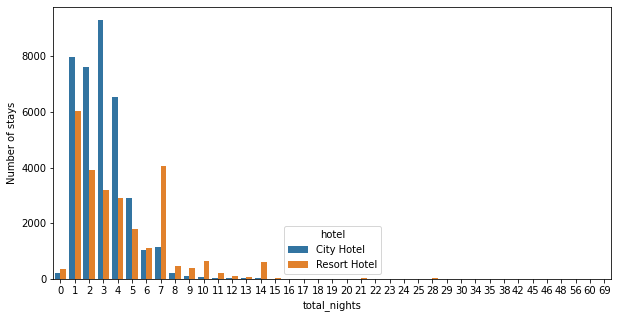

In [ ]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'total_nights', y = 'Number of stays',data= stay,hue='hotel')

Mostly people prefer to stay at the hotels less than 7 days.

## Correlation Conclusion:
### 1. It can be observed arrival_date_week_number and arrival_date_year are 54% negative correlated
### 2. Company and agent are positive correlated by 35%
### 3. adr and children are positive correlated by 32%

# Conclusion:
#### 1.	Around 66% bookings are for City hotel and 34% bookings are for  Resort hotel, therefore City Hotel is busier than Resort hotel. Also the overall adr of City hotel is slightly higher than Resort hotel. 
#### 2. Mostly guests stay for less than 7 days in hotel and for longer stays Resort hotel is preferred. 
#### 3. Both hotels have significantly higher booking cancellation rates and very few guests less than 3 % return for  another booking in City hotel. 5% guests return for stay in Resort hotel. 
#### 4. Most of the guests came from european countries, with most no. of guest coming from Portugal. 
#### 5. Guests use different channels for making bookings out of which most preferred way is TA/TO. 
#### 6. For hotels higher adr deals come via GDS channel, so hotels should increase their popularity on this channel. 
#### 7. Almost 30% of bookings via TA/TO are cancelled. 
#### 8. Not getting same room as reserved, longer lead time and waiting time do not affect cancellation of bookings. Although different room allotment do lowers the adr. 
#### 9. July- August are the most busier and profitable months for both of hotels. 
#### 10. Within a month, adr gradually increases as month ends, with small sudden rise on weekends. 
#### 11. Couples are the most common guests for hotels, hence hotels can plan services according to couples needs  to increase revenue. 
#### 12. More number of people in guests results in more number of special requests. 
#### 13. Bookings made via complementary market segment and adults have on average high no. of special request.
#### 14. For customers, generally the longer stays (more than 15 days) can result in better deals in terms of low adr. 